## [Reference](https://postgis.gishub.org/chapters/projection.html)
* [Introduction to PostGIS](https://postgis.net/workshops/postgis-intro)
* [Using SQL with Geodatabases](https://desktop.arcgis.com/en/arcmap/latest/manage-data/using-sql-with-gdbs/sql-and-enterprise-geodatabases.htm)

## Connecting to the database

In [1]:
import os
from sqlalchemy import create_engine
from sqlalchemy import inspect
import geopandas as gpd

In [2]:
host = "localhost"
database = "nyc"
user = os.getenv('SQL_USER')
password = os.getenv('SQL_PASSWORD')

In [3]:
connection_string = f"postgresql://{user}:{password}@{host}/{database}"
engine = create_engine(connection_string)

In [4]:
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys',
 'nyc_census_blocks',
 'nyc_homicides',
 'nyc_subway_stations',
 'nyc_streets',
 'geometries',
 'nyc_neighborhoods']

## Reading data from PostGIS

In [5]:
sql = 'SELECT * FROM nyc_neighborhoods'
gdf = gpd.read_postgis(sql, con=engine)
gdf.head()

,id,geom,boroname,name
0,1,"MULTIPOLYGON (((582771.426 4495167.427, 584651...",Brooklyn,Bensonhurst
1,2,"MULTIPOLYGON (((585508.753 4509691.267, 586826...",Manhattan,East Village
2,3,"MULTIPOLYGON (((583263.278 4509242.626, 583276...",Manhattan,West Village
3,4,"MULTIPOLYGON (((597640.009 4520272.720, 597647...",The Bronx,Throggs Neck
4,5,"MULTIPOLYGON (((595285.205 4525938.798, 595348...",The Bronx,Wakefield-Williamsbridge


In [6]:
gdf.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Writing files

In [7]:
out_dir = os.path.expanduser('~/Downloads')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [8]:
out_shp = os.path.join(out_dir, 'nyc_neighborhoods.shp')
gdf.to_file(out_shp)

In [9]:
gdf.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Measuring area

In [10]:
gdf = gdf.set_index("name")
gdf["area"] = gdf.area
gdf["area"].info

<bound method Series.info of name
Bensonhurst                 5.828014e+06
East Village                1.632117e+06
West Village                1.044615e+06
Throggs Neck                8.274104e+06
Wakefield-Williamsbridge    6.925334e+06
                                ...     
Red Hook                    1.146229e+05
Douglastown-Little Neck     1.753248e+07
Whitestone                  2.804182e+04
Steinway                    1.232809e+06
Rosebank                    4.855008e+04
Name: area, Length: 129, dtype: float64>

## Getting polygon bounary

In [11]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

name
Bensonhurst                 MULTILINESTRING ((582771.426 4495167.427, 5846...
East Village                MULTILINESTRING ((585508.753 4509691.267, 5868...
West Village                MULTILINESTRING ((583263.278 4509242.626, 5832...
Throggs Neck                MULTILINESTRING ((597640.009 4520272.720, 5976...
Wakefield-Williamsbridge    MULTILINESTRING ((595285.205 4525938.798, 5953...
                                                  ...                        
Red Hook                    MULTILINESTRING ((584212.898 4502321.474, 5843...
Douglastown-Little Neck     MULTILINESTRING ((605082.288 4513540.148, 6050...
Whitestone                  MULTILINESTRING ((600138.493 4516909.499, 6001...
Steinway                    MULTILINESTRING ((593231.553 4515088.539, 5933...
Rosebank                    MULTILINESTRING ((579051.030 4495284.647, 5790...
Name: boundary, Length: 129, dtype: geometry

## Getting polygon centroid

In [12]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

name
Bensonhurst                 POINT (584653.928 4495863.485)
East Village                POINT (585979.191 4508859.571)
West Village                POINT (583832.311 4509898.957)
Throggs Neck                POINT (599226.101 4519629.728)
Wakefield-Williamsbridge    POINT (596720.653 4527170.627)
                                         ...              
Red Hook                    POINT (583382.229 4501563.758)
Douglastown-Little Neck     POINT (607360.858 4511731.933)
Whitestone                  POINT (599563.892 4517128.417)
Steinway                    POINT (592429.851 4515507.528)
Rosebank                    POINT (579260.556 4495409.906)
Name: centroid, Length: 129, dtype: geometry

## Making maps

<Axes: >

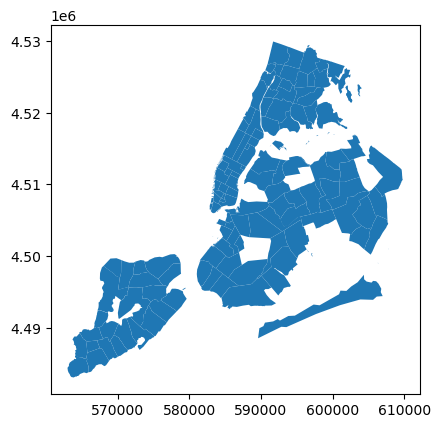

In [13]:
gdf.plot()

<Axes: >

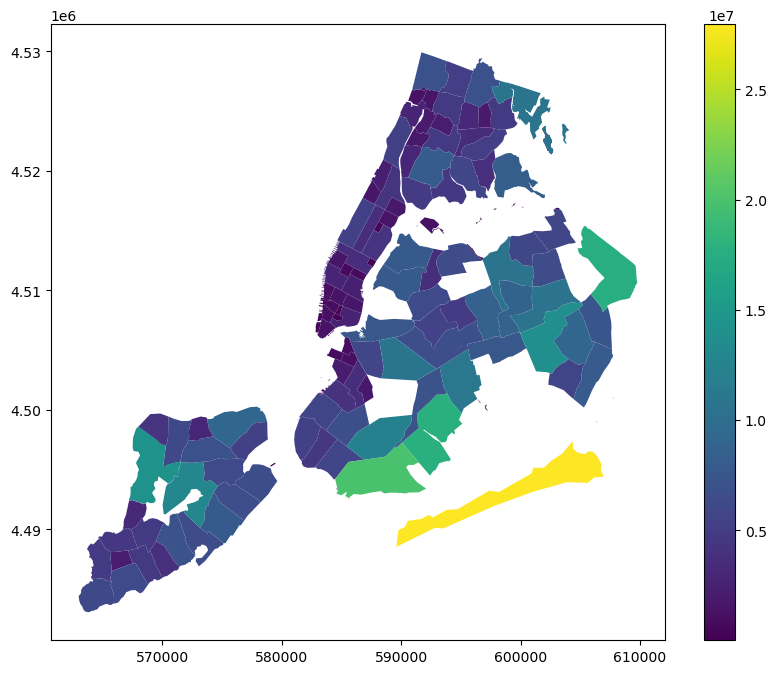

In [14]:
gdf.plot("area", legend=True, figsize=(10, 8))

<Axes: >

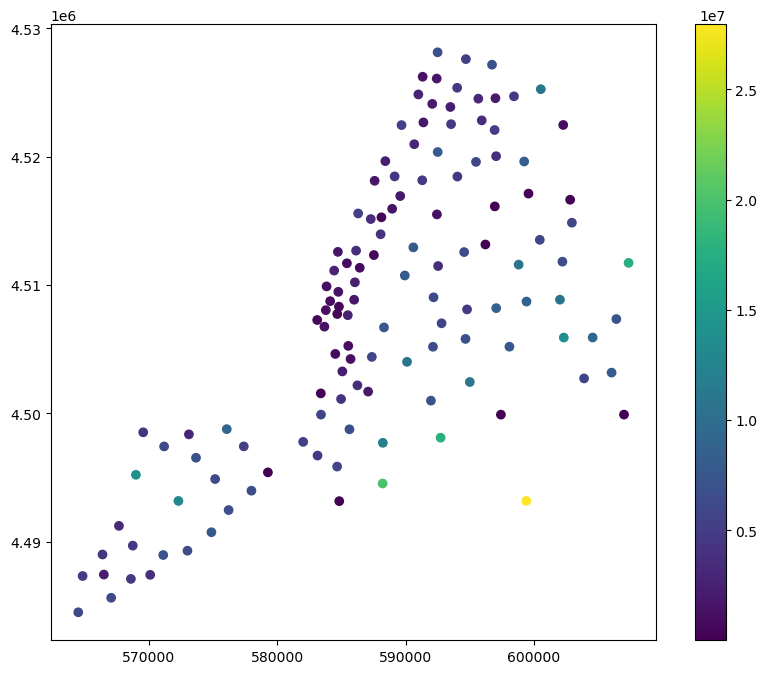

In [15]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True,figsize=(10, 8))

<Axes: >

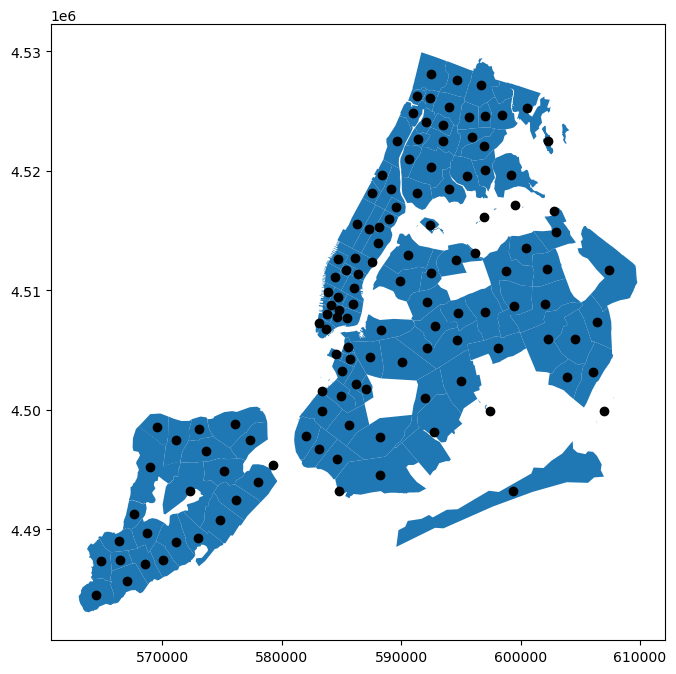

In [16]:
ax = gdf["geom"].plot(figsize=(10, 8))
gdf["centroid"].plot(ax=ax, color="black")

In [17]:
gdf = gdf.set_geometry("geom")

## Reprojecting data

In [18]:
sql = 'SELECT * FROM nyc_neighborhoods'
gdf = gpd.read_postgis(sql, con=engine)
gdf_crs = gdf.to_crs(epsg="4326")
gdf_crs.head()

,id,geom,boroname,name
0,1,"MULTIPOLYGON (((-74.02167 40.60318, -73.99913 ...",Brooklyn,Bensonhurst
1,2,"MULTIPOLYGON (((-73.98734 40.73372, -73.97184 ...",Manhattan,East Village
2,3,"MULTIPOLYGON (((-74.01399 40.72991, -74.01381 ...",Manhattan,West Village
3,4,"MULTIPOLYGON (((-73.84204 40.82767, -73.84190 ...",The Bronx,Throggs Neck
4,5,"MULTIPOLYGON (((-73.86910 40.87898, -73.86831 ...",The Bronx,Wakefield-Williamsbridge


In [19]:
geojson = gdf_crs.__geo_interface__

## Displaying data on an interative map

In [20]:
import geemap

In [21]:
m = geemap.Map(center=[40.7341, -73.9113], zoom=10, ee_initialize=False)
m

Map(center=[40.7341, -73.9113], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

In [22]:
style = {
    "stroke": True,
    "color": "#000000",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.4,
}

m.add_geojson(geojson, style=style, layer_name="nyc neighborhoods")

In [23]:
sql2 = 'SELECT * FROM nyc_subway_stations'
gdf_subway = gpd.read_postgis(sql2, con=engine)
gdf_subway_crs = gdf_subway.to_crs(epsg="4326")
subway_geojson = gdf_subway_crs.__geo_interface__
m.add_geojson(subway_geojson, layer_name="nyc subway stations")